# Using Tableau Methods

Runge-Kutta methods are defined by Butcher tableaus. These are matrices of coefficients which define the steps of a Runge-Kutta method. This simplified way of specifying Runge-Kutta methods is useful for ease of implementation and sharing of methods.

Note: These methods are generally for researchers or mathematicans who are interested in testing their own (or a large assortment of) methods. If you're simply looking for fast and optimized methods, this is not the right place!

## The General Tableau Solver

DifferentialEquations.jl has general tableau methods which allow a user to easily to define new numerical methods simply by defining the associated coefficients. These methods will utilize many performance optimizations, such as being fully cached and devectorized, and can designed as a FSAL scheme to skip a function calculation per step. Note that the tableau methods are not the most efficient: hand-optimized methods allow one to unroll the tableau into stack allocated coefficients which will always do better. That is why DifferentialEquations.jl offers optimized versions of the most popular solvers like DP5.

However, DifferentialEquations.jl offers over a hundred tableaus to play with. Please see [the solver documentation](http://JuliaDiffEq.github.io/DifferentialEquations.jl/latest/solvers/ode_solve/) for a full list. For example, we can construct the Dormand-Prince 4/5 tableau via the command:

In [22]:
using DifferentialEquations
tab = constructDormandPrince()

DifferentialEquations.ExplicitRKTableau(Rational{Int64}[0//1 0//1 0//1 0//1 0//1 0//1 0//1; 1//5 0//1 0//1 0//1 0//1 0//1 0//1; 3//40 9//40 0//1 0//1 0//1 0//1 0//1; 44//45 -56//15 32//9 0//1 0//1 0//1 0//1; 19372//6561 -25360//2187 64448//6561 -212//729 0//1 0//1 0//1; 9017//3168 -355//33 46732//5247 49//176 -5103//18656 0//1 0//1; 35//384 0//1 500//1113 125//192 -2187//6784 11//84 0//1],Rational{Int64}[0//1,1//5,3//10,4//5,8//9,1//1,1//1],Rational{Int64}[35//384,0//1,500//1113,125//192,-2187//6784,11//84,0//1],Rational{Int64}[5179//57600,0//1,7571//16695,393//640,-92097//339200,187//2100,1//40],7,5,4,true)

Here is what that function looks like:

In [ ]:
function constructDormandPrince(T::Type = Float64)
  A = [0 0 0 0 0 0 0
      1//5 0 0 0 0 0 0
      3//40 9//40 0 0 0 0 0
      44//45 -56//15 32//9 0 0 0 0
      19372//6561 -25360//2187 64448//6561 -212//729 0 0 0
      9017//3168 -355//33 46732//5247 49//176 -5103//18656 0 0
      35//384 0 500//1113 125//192 -2187//6784 11//84 0]
  c = [0;1//5;3//10;4//5;8//9;1;1]
  α = [35//384;0;500//1113;125//192;-2187//6784;11//84;0]
  αEEst = [5179//57600;0;7571//16695;393//640;-92097//339200;187//2100;1//40]
  return(ExplicitRKTableau(A,c,α,5,αEEst=αEEst,adaptiveorder=4,fsal=true))
end

It's pretty clear how this is done: A is the Butcher matrix, c are the timestep sizes, α are the end summation weights, and αEEst are the end summation weights for the error estimate. Then we construct the `ExplicitRKTableau` object using these arrays, plus we feed it the order, the order of the error estimating step, and whether or not the scheme uses FSAL (First Same as Last). 


DifferentialEquations.jl can solve directly using tableau using the `ExplicitRK` method with the keyword option `tableau`. For example:


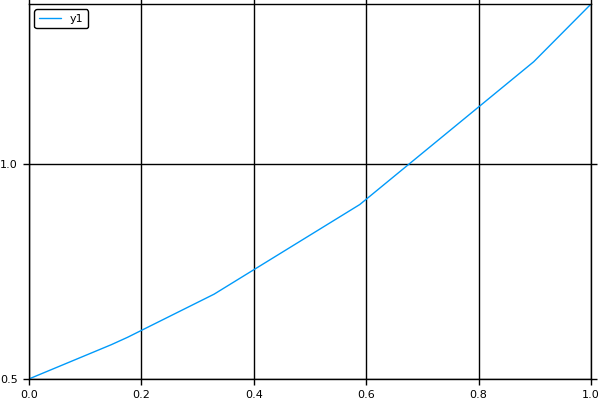

In [23]:
sol = solve(prob_ode_linear,[0,1],alg=:ExplicitRK,tableau=tab)
plot(sol)

## Stability Region Plotting

Note that a plot recipe is defined for tableaus which allows one to plot the stability region. For example:


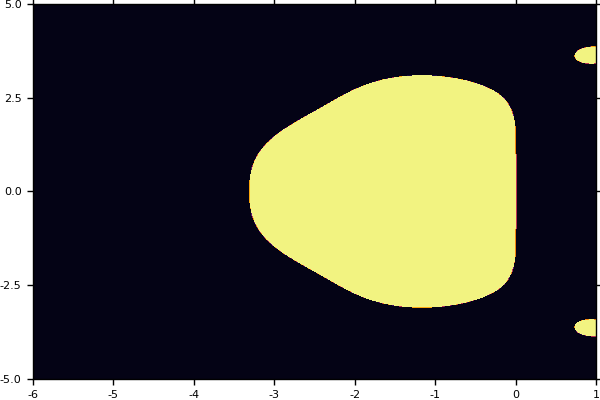

In [11]:
plot(tab)

We can modify the plot by changing the `xlim=[xmin,xmax]` and `ylim=[ymin,ymax]`, and change the accuracy of the plot via `Δx` and `Δy`. For example, let's plot the stability region of the implicit Euler method:


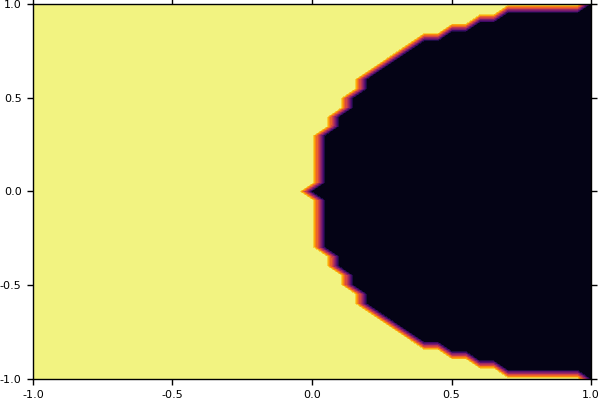

In [18]:
tab = constructImplicitEuler()
plot(tab,xlim=[-1,1],ylim=[-1,1],Δx=1//20,Δy=1//20)